<a href="https://colab.research.google.com/github/ReenuPEldhose/OpenAITraining/blob/main/pharyngitis_detection_in_kids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's continue from where we last left. In this lab, we will be cleaning our data to see how our models improve.

Let's quickly get our data, and repeat the steps we performed in the last lab.

In [2]:
# read the data
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/pharyngitis.csv')

In [3]:
# Forward fill missing values in specific columns
columns_to_fill = ['pain', 'swollenadp', 'tender', 'tonsillarswelling', 'exudate', 'temperature', 'sudden', 'cough', 'rhinorrhea', 'conjunctivitis', 'headache', 'erythema', 'petechiae', 'abdopain', 'diarrhea', 'nauseavomit', 'scarlet']
data[columns_to_fill] = data[columns_to_fill].fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number             676 non-null    int64  
 1   age_y              676 non-null    float64
 2   radt               676 non-null    int64  
 3   pain               676 non-null    float64
 4   swollenadp         676 non-null    float64
 5   tender             676 non-null    float64
 6   tonsillarswelling  676 non-null    float64
 7   exudate            676 non-null    float64
 8   temperature        676 non-null    float64
 9   sudden             676 non-null    float64
 10  cough              676 non-null    float64
 11  rhinorrhea         676 non-null    float64
 12  conjunctivitis     676 non-null    float64
 13  headache           676 non-null    float64
 14  erythema           676 non-null    float64
 15  petechiae          676 non-null    float64
 16  abdopain           676 non

<ipython-input-3-f19369696f4a>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[columns_to_fill] = data[columns_to_fill].fillna(method='ffill')


In [4]:
# look at the data
data.head(20)

,number,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
0,2000,7.0,0,1.0,1.0,0.0,0.0,0.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2001,11.7,1,1.0,1.0,0.0,0.0,0.0,38.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2002,5.6,1,1.0,2.0,1.0,1.0,0.0,37.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2003,6.0,1,1.0,2.0,1.0,1.0,0.0,40.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2004,5.2,0,1.0,2.0,0.0,1.0,0.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,2005,4.0,0,0.0,2.0,0.0,0.0,0.0,38.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,2006,8.2,1,1.0,1.0,1.0,0.0,0.0,38.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
7,2007,4.2,0,1.0,1.0,0.0,0.0,0.0,39.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2008,9.5,1,1.0,2.0,0.0,0.0,0.0,39.3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9,2009,3.6,0,1.0,2.0,0.0,0.0,0.0,37.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [5]:
# Replace 1 with 'Yes' and 0 with 'No'
data['radt'] = data['radt'].replace({1: 'yes', 0: 'no'})
data.head(20)

,number,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
0,2000,7.0,no,1.0,1.0,0.0,0.0,0.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2001,11.7,yes,1.0,1.0,0.0,0.0,0.0,38.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2002,5.6,yes,1.0,2.0,1.0,1.0,0.0,37.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2003,6.0,yes,1.0,2.0,1.0,1.0,0.0,40.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2004,5.2,no,1.0,2.0,0.0,1.0,0.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,2005,4.0,no,0.0,2.0,0.0,0.0,0.0,38.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,2006,8.2,yes,1.0,1.0,1.0,0.0,0.0,38.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
7,2007,4.2,no,1.0,1.0,0.0,0.0,0.0,39.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2008,9.5,yes,1.0,2.0,0.0,0.0,0.0,39.3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9,2009,3.6,no,1.0,2.0,0.0,0.0,0.0,37.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
data.columns

Index(['number', 'age_y', 'radt', 'pain', 'swollenadp', 'tender',
       'tonsillarswelling', 'exudate', 'temperature', 'sudden', 'cough',
       'rhinorrhea', 'conjunctivitis', 'headache', 'erythema', 'petechiae',
       'abdopain', 'diarrhea', 'nauseavomit', 'scarlet'],
      dtype='object')

<Axes: >

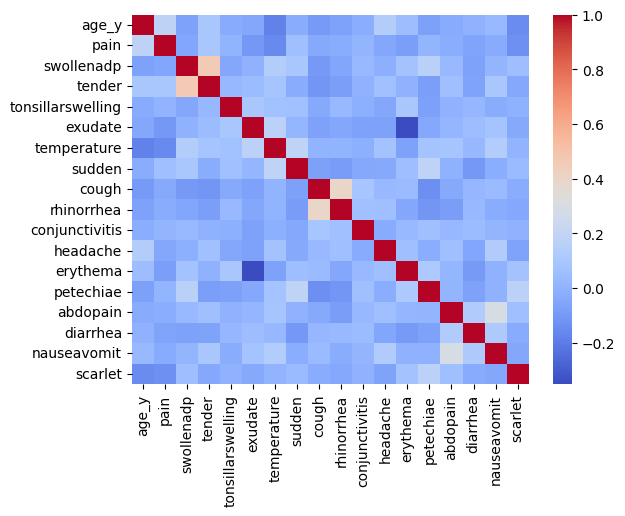

In [7]:
import seaborn as sns
inp_cols = ['age_y',  'pain', 'swollenadp', 'tender',
       'tonsillarswelling', 'exudate', 'temperature', 'sudden', 'cough',
       'rhinorrhea', 'conjunctivitis', 'headache', 'erythema', 'petechiae',
       'abdopain', 'diarrhea', 'nauseavomit', 'scarlet']
cr = data[inp_cols].corr()
sns.heatmap(cr, cmap='coolwarm')

<Axes: >

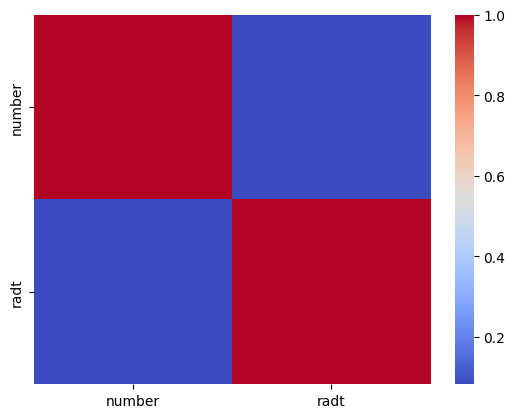

In [8]:
import copy
y = copy.copy(data)

y["radt"] = y['radt'].map(lambda val: 1 if val=='yes' else 0)
y = y.loc[: , ['number','radt']]

cr = y.corr()

sns.heatmap(cr, cmap='coolwarm')

In [9]:
# set the index
data = data.set_index('number')

In [10]:
data.head(20)

,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
number,,,,,,,,,,,,,,,,,,,
2000,7.0,no,1.0,1.0,0.0,0.0,0.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2001,11.7,yes,1.0,1.0,0.0,0.0,0.0,38.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2002,5.6,yes,1.0,2.0,1.0,1.0,0.0,37.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2003,6.0,yes,1.0,2.0,1.0,1.0,0.0,40.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2004,5.2,no,1.0,2.0,0.0,1.0,0.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2005,4.0,no,0.0,2.0,0.0,0.0,0.0,38.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2006,8.2,yes,1.0,1.0,1.0,0.0,0.0,38.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2007,4.2,no,1.0,1.0,0.0,0.0,0.0,39.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2008,9.5,yes,1.0,2.0,0.0,0.0,0.0,39.3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


This dataset doesn't have any null values, but let's go through the check and steps anyway.

In [11]:
data.isna().sum()

,0
age_y,0
radt,0
pain,0
swollenadp,0
tender,0
tonsillarswelling,0
exudate,0
temperature,0
sudden,0
cough,0


In [12]:
#drop null values if any
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 2000 to 3289
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_y              676 non-null    float64
 1   radt               676 non-null    object 
 2   pain               676 non-null    float64
 3   swollenadp         676 non-null    float64
 4   tender             676 non-null    float64
 5   tonsillarswelling  676 non-null    float64
 6   exudate            676 non-null    float64
 7   temperature        676 non-null    float64
 8   sudden             676 non-null    float64
 9   cough              676 non-null    float64
 10  rhinorrhea         676 non-null    float64
 11  conjunctivitis     676 non-null    float64
 12  headache           676 non-null    float64
 13  erythema           676 non-null    float64
 14  petechiae          676 non-null    float64
 15  abdopain           676 non-null    float64
 16  diarrhea           676 non-

Get the label and features out

In [13]:
data.head(20)

,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
number,,,,,,,,,,,,,,,,,,,
2000,7.0,no,1.0,1.0,0.0,0.0,0.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2001,11.7,yes,1.0,1.0,0.0,0.0,0.0,38.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2002,5.6,yes,1.0,2.0,1.0,1.0,0.0,37.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2003,6.0,yes,1.0,2.0,1.0,1.0,0.0,40.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2004,5.2,no,1.0,2.0,0.0,1.0,0.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2005,4.0,no,0.0,2.0,0.0,0.0,0.0,38.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2006,8.2,yes,1.0,1.0,1.0,0.0,0.0,38.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2007,4.2,no,1.0,1.0,0.0,0.0,0.0,39.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2008,9.5,yes,1.0,2.0,0.0,0.0,0.0,39.3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [14]:
y = data['radt'].map(lambda val: 1 if val=='yes' else 0)

In [15]:
y.head(20)

,radt
number,
2000,0
2001,1
2002,1
2003,1
2004,0
2005,0
2006,1
2007,0
2008,1


In [16]:
x = data.iloc[:, 2:]

In [17]:
x.columns

Index(['pain', 'swollenadp', 'tender', 'tonsillarswelling', 'exudate',
       'temperature', 'sudden', 'cough', 'rhinorrhea', 'conjunctivitis',
       'headache', 'erythema', 'petechiae', 'abdopain', 'diarrhea',
       'nauseavomit', 'scarlet'],
      dtype='object')

In [18]:
x.head()

,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
number,,,,,,,,,,,,,,,,,
2000,1.0,1.0,0.0,0.0,0.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2001,1.0,1.0,0.0,0.0,0.0,38.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2002,1.0,2.0,1.0,1.0,0.0,37.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2003,1.0,2.0,1.0,1.0,0.0,40.8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2004,1.0,2.0,0.0,1.0,0.0,40.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


Let's also get the train-test divide done

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                      random_state=42,
                                      test_size=0.2)

From the last exercise, we remember that 'diagnosis' was our label column. There were two types of results: 'M' and 'B'.

Now that we have labels and features separately, it's easier to cleanse our data. Let's begin with normalizing our data. Normalization offers a uniform scale across the dataset.

One of the ways to normalize the data is Z-Scoring. The formulae is:


normalized data = (data-mean)/standard_deviation

We can get the statistics from the dataset:

In [20]:
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
pain,540.0,0.835185,0.371357,0.0,1.0,1.0,1.0,1.0
swollenadp,540.0,0.994444,0.967930,0.0,0.0,1.0,2.0,3.0
tender,540.0,0.200000,0.400371,0.0,0.0,0.0,0.0,1.0
tonsillarswelling,540.0,0.729630,0.444563,0.0,0.0,1.0,1.0,1.0
exudate,540.0,0.209259,0.407157,0.0,0.0,0.0,0.0,1.0
temperature,540.0,38.754630,0.852562,36.6,38.2,39.0,39.4,41.0
sudden,540.0,0.811111,0.391783,0.0,1.0,1.0,1.0,1.0
cough,540.0,0.398148,0.489970,0.0,0.0,0.0,1.0,1.0
rhinorrhea,540.0,0.364815,0.481825,0.0,0.0,0.0,1.0,1.0
conjunctivitis,540.0,0.029630,0.169721,0.0,0.0,0.0,0.0,1.0


Question- why did we transpose the statistics?

In [21]:
mu = stats['mean']
sigma = stats['std']
norm_xtrain = (xtrain-mu)/sigma

In [22]:
norm_xtest = (xtest-mu)/sigma

Observe how we calculate mu (mean) and sigma (standard deviation) from only training data, and then applied the same rules to testing data.

One advantage of Z-Scoring method (besides being able to normalize) is outlier detection. Let's first use the box plot to visualize any outliers.

Outliers would be the values greater than 3, and less than -3.

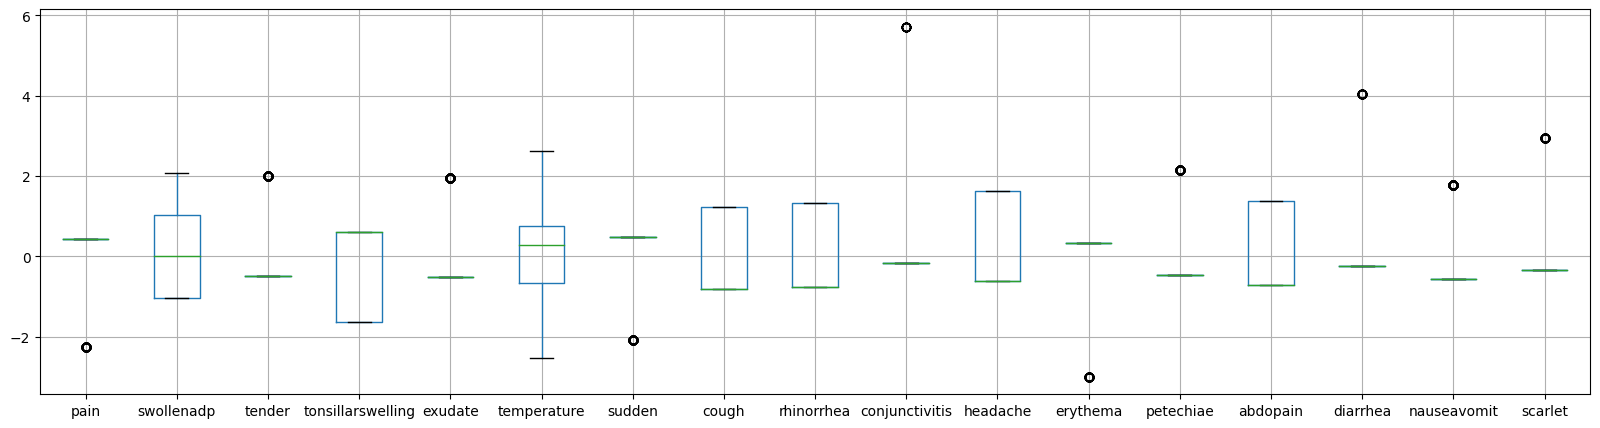

In [23]:
plt.figure(figsize=(20,5))
norm_xtrain.boxplot(fontsize=10)
plt.show()

Question- Are there any outliers?

Now, let's deal with the outliers. There are two solutions to managing them:



1.   Replace them- with mean, median, mode or a custom value
2.   Remove them- either row wise or column wise



Let's have a look at the outliers.

In [24]:
# total outliers in every column
(norm_xtrain>3).sum() + (norm_xtrain<-3).sum()

,0
pain,0
swollenadp,0
tender,0
tonsillarswelling,0
exudate,0
temperature,0
sudden,0
cough,0
rhinorrhea,0
conjunctivitis,16


In [25]:
#let's have a look at what outliers looks like
norm_xtrain[(norm_xtrain['conjunctivitis']>3) |
            (norm_xtrain['conjunctivitis']<-3)]

,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
number,,,,,,,,,,,,,,,,,
2019,-2.249007,1.038872,-0.499537,-1.641229,-0.513952,1.226152,0.482126,-0.812597,-0.757153,5.71746,-0.611026,0.333025,2.162299,1.383967,-0.246558,1.774262,-0.339836
3087,0.443817,-1.027392,-0.499537,0.608171,-0.513952,0.874271,0.482126,-0.812597,1.318291,5.71746,-0.611026,0.333025,-0.461614,1.383967,4.048327,-0.562571,-0.339836
2095,0.443817,-1.027392,-0.499537,0.608171,-0.513952,-0.298664,0.482126,1.228344,-0.757153,5.71746,-0.611026,0.333025,2.162299,-0.721222,-0.246558,-0.562571,-0.339836
3120,0.443817,1.038872,1.998147,0.608171,-0.513952,-0.298664,0.482126,1.228344,1.318291,5.71746,-0.611026,0.333025,-0.461614,-0.721222,-0.246558,-0.562571,-0.339836
2020,0.443817,1.038872,-0.499537,-1.641229,-0.513952,0.287804,0.482126,-0.812597,-0.757153,5.71746,-0.611026,0.333025,2.162299,-0.721222,-0.246558,-0.562571,-0.339836
2062,0.443817,-1.027392,-0.499537,0.608171,-0.513952,-0.298664,0.482126,1.228344,-0.757153,5.71746,-0.611026,0.333025,-0.461614,-0.721222,4.048327,-0.562571,2.937150
3201,0.443817,1.038872,-0.499537,0.608171,-0.513952,-0.298664,0.482126,-0.812597,-0.757153,5.71746,1.633560,0.333025,-0.461614,1.383967,-0.246558,-0.562571,2.937150
2417,0.443817,1.038872,1.998147,0.608171,-0.513952,1.460739,0.482126,-0.812597,-0.757153,5.71746,-0.611026,0.333025,2.162299,1.383967,-0.246558,1.774262,-0.339836
2160,0.443817,0.005740,-0.499537,0.608171,-0.513952,-2.058067,-2.070306,1.228344,1.318291,5.71746,1.633560,0.333025,-0.461614,1.383967,-0.246558,-0.562571,-0.339836


Now that we have seen some outliers, let's remove them.

In [26]:
idx_to_remove = []
for col in norm_xtrain.columns:
  idx = norm_xtrain[(norm_xtrain[col]>3) |
            (norm_xtrain[col]<-3)].index
  idx_to_remove.extend(idx)
print("These ids are outliers: ",idx_to_remove)


These ids are outliers:  [2019, 3087, 2095, 3120, 2020, 2062, 3201, 2417, 2160, 2331, 2445, 3109, 3082, 2353, 2218, 2365, 3192, 3087, 3286, 2035, 2100, 2422, 3101, 2449, 2062, 2580, 2590, 2173, 3231, 2064, 3031, 2482, 2145, 3032, 2582, 3214, 3100, 2418, 3188, 2263, 2115, 2305, 3285, 2122, 2333, 2346, 2599]


In [27]:
len(idx_to_remove)

47

In [28]:
len(norm_xtrain), len(ytrain)

(540, 540)

In [ ]:
#dir(pd)

In [ ]:
# OPTIONAL-> uncomment below two blocks if you want to remove the outliers
# if you want to keep the outliers, let this be commented

#norm_xtrain.drop(index=idx_to_remove, inplace=True)
#ytrain.drop(index=idx_to_remove, inplace=True)

In [ ]:
len(norm_xtrain), len(ytrain)

(540, 540)

In [29]:
print(norm_xtrain.isna().sum())


pain                 0
swollenadp           0
tender               0
tonsillarswelling    0
exudate              0
temperature          0
sudden               0
cough                0
rhinorrhea           0
conjunctivitis       0
headache             0
erythema             0
petechiae            0
abdopain             0
diarrhea             0
nauseavomit          0
scarlet              0
dtype: int64


In [30]:
ytrain[:20]

,radt
number,
2307,0
2019,0
3143,1
2535,1
3252,0
2066,0
2394,1
3014,0
2031,0


Now let's perform some machine learning to see if anything changes.

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
# HPs -> factors that change the model outcome during training or inference
all_algos = {
    "logisitc regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Support Vectors with Linear Kernel": SVC(kernel='linear'),
    "Support Vectors with RBF kernel": SVC(kernel='rbf'),
    "Linear Support Vectors": LinearSVC(),
    "Decision Tree50": DecisionTreeClassifier(max_depth=50),
    "Decision Tree75": DecisionTreeClassifier(max_depth=75),
    "Decision Tree25": DecisionTreeClassifier(max_depth=25),
    "Decision Tree125": DecisionTreeClassifier(max_depth=125),
    "Decision Tree250": DecisionTreeClassifier(max_depth=250),
    "Neighbors": KNeighborsClassifier(),
    "Random Forest100": RandomForestClassifier(),
    "Random Forest50": RandomForestClassifier(n_estimators=50),
    "Random Forest500": RandomForestClassifier(n_estimators=500),
    "Random Forest250": RandomForestClassifier(n_estimators=250)
}

In [34]:
from sklearn.metrics import f1_score
all_acc = []
all_f1_score = []
best_acc = 0.0
best_f1_score = 0.0
best_model_by_acc = ""
best_model_by_f1 = ""
for algoname, algo in all_algos.items():
  print('*********')
  print('Beginning to train ', algoname, ' model')
  algo.fit(norm_xtrain,ytrain)
  predictions = algo.predict(norm_xtest)
  acc_score = algo.score(norm_xtest, ytest)
  f1 = f1_score(predictions, ytest, average='binary')
  all_acc.append(acc_score)
  all_f1_score.append(f1)
  print('Model Acc Score = ', acc_score*100,'%', end=" ")
  print(', Model F1 Score = ', f1)
  if acc_score > best_acc:
    best_acc = acc_score
    best_model_by_acc = algoname
  if f1 > best_f1_score:
    best_f1_score = f1
    best_model_by_f1 = algoname


*********
Beginning to train  logisitc regression  model
Model Acc Score =  65.44117647058823 % , Model F1 Score =  0.5913043478260871
*********
Beginning to train  Naive Bayes  model
Model Acc Score =  63.23529411764706 % , Model F1 Score =  0.5535714285714286
*********
Beginning to train  Support Vectors with Linear Kernel  model
Model Acc Score =  65.44117647058823 % , Model F1 Score =  0.6178861788617886
*********
Beginning to train  Support Vectors with RBF kernel  model
Model Acc Score =  63.23529411764706 % , Model F1 Score =  0.5535714285714286
*********
Beginning to train  Linear Support Vectors  model
Model Acc Score =  65.44117647058823 % , Model F1 Score =  0.5913043478260871
*********
Beginning to train  Decision Tree50  model
Model Acc Score =  62.5 % , Model F1 Score =  0.6222222222222223
*********
Beginning to train  Decision Tree75  model
Model Acc Score =  62.5 % , Model F1 Score =  0.6222222222222223
*********
Beginning to train  Decision Tree25  model


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Acc Score =  62.5 % , Model F1 Score =  0.6106870229007635
*********
Beginning to train  Decision Tree125  model
Model Acc Score =  61.76470588235294 % , Model F1 Score =  0.6176470588235293
*********
Beginning to train  Decision Tree250  model
Model Acc Score =  61.76470588235294 % , Model F1 Score =  0.6060606060606061
*********
Beginning to train  Neighbors  model
Model Acc Score =  58.82352941176471 % , Model F1 Score =  0.5483870967741935
*********
Beginning to train  Random Forest100  model
Model Acc Score =  64.70588235294117 % , Model F1 Score =  0.6065573770491803
*********
Beginning to train  Random Forest50  model
Model Acc Score =  66.91176470588235 % , Model F1 Score =  0.6280991735537191
*********
Beginning to train  Random Forest500  model
Model Acc Score =  64.70588235294117 % , Model F1 Score =  0.6190476190476191
*********
Beginning to train  Random Forest250  model
Model Acc Score =  64.70588235294117 % , Model F1 Score =  0.625


In [35]:
best_model_by_acc

'Random Forest50'

In [36]:
best_acc

0.6691176470588235

Some of the models should have shown tiny improvements now.

In [37]:
best_model_by_f1

'Random Forest50'

In [38]:
best_f1_score

0.6280991735537191

Observation- compare results with your peers. Are your results similar? What does this tell you about machine learning behaviour?